In [1]:
import os
import pickle
import importlib
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.utils import shuffle
#from skimage import exposure
#os.chdir('~/') #Select your working directory
cwd = os.getcwd()
#Functions=importlib.import_module("Functions")
#Functions=importlib.reload(Functions)
print(cwd)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


/home/ubuntu/Etude-de-Cas


In [2]:
def load_pickled_data(file, columns):
    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda c: dataset[c], columns))

def preprocess_dataset(X):
    #Convert to grayscale, e.g. single Y channel
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X

In [3]:
X_train, y_train = load_pickled_data("train.p", ['features', 'labels'])
X_test, y_test = load_pickled_data("test.p", ['features', 'labels'])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


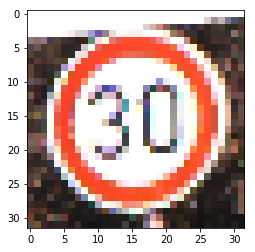

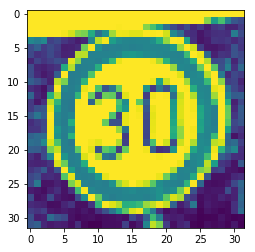

(39209, 32, 32, 1)


In [5]:
from keras.utils import to_categorical
target = to_categorical(y_train)
target_test=to_categorical(y_test)


plt.imshow(X_train[412])
plt.show()

X_train=preprocess_dataset(X_train)
X_test=preprocess_dataset(X_test)

plt.imshow(X_train[412].reshape(32,32))
plt.show()

print("shape of the train set:"+X_train.shape)

num_classes=target_train.shape[1]

input_shape=X_train[1].shape

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



In [27]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

In [28]:
model.fit(X_train,target,
          epochs=20,
          batch_size=128,
          validation_split=0.33)

Train on 26270 samples, validate on 12939 samples
Epoch 1/20
26270/26270 [==============================] - 5s 177us/step - loss: 2.2550 - acc: 0.3353 - val_loss: 9.1585 - val_acc: 0.0097
Epoch 2/20
26270/26270 [==============================] - 4s 155us/step - loss: 1.1593 - acc: 0.5978 - val_loss: 12.4287 - val_acc: 0.0098
Epoch 3/20
26270/26270 [==============================] - 4s 155us/step - loss: 0.8718 - acc: 0.6838 - val_loss: 13.7947 - val_acc: 0.0099
Epoch 4/20
26270/26270 [==============================] - 4s 155us/step - loss: 0.7712 - acc: 0.7141 - val_loss: 14.3205 - val_acc: 0.0097
Epoch 5/20
26270/26270 [==============================] - 4s 155us/step - loss: 0.7014 - acc: 0.7356 - val_loss: 14.4944 - val_acc: 0.0099
Epoch 6/20
26270/26270 [==============================] - 4s 155us/step - loss: 0.6401 - acc: 0.7556 - val_loss: 14.8268 - val_acc: 0.0098
Epoch 7/20
26270/26270 [==============================] - 4s 155us/step - loss: 0.6160 - acc: 0.7664 - val_loss: 15.0

In [30]:
model.evaluate(X_test, target_test)

12630/12630 [==============================] - 1s 90us/step


[5.032694237740004, 0.661124307233383]

In [31]:
model.save("first_model")